In [3]:
import keras
import pandas
import sklearn
import scipy
import dask.dataframe as dd

In [4]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier

In [ ]:
# use this code to transfer between csv to parquet
df.to_parquet("train_data.parquet")

In [72]:
original_training_data = pandas.read_csv("train_data.csv", index_col=0)

In [13]:
training_sample = original_training_data.sample(frac=0.7)

In [14]:
import keras
import pandas
import sklearn
import scipy
import dask.dataframe as dd

(38920, 247)

In [15]:
training_sample.to_csv("train_data_sample.csv", index=False)

# Generate Training and Test samples from the training data we have available, so all models access the same data

In [68]:
from sklearn.model_selection import train_test_split

In [73]:
original_training_data.shape

(389196, 246)

In [74]:
original_training_data.head(10)

,id,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,0,1,1,1,0,0,0,0,1.350979e-01,1,...,0,0,1,1,0,1,1,1,0,1
1,1,1,0,1,0,0,1,0,2.735041e-01,1,...,0,1,0,1,1,0,0,0,1,0
2,2,1,0,1,0,0,1,0,2.819095e-01,0,...,1,1,0,0,0,0,1,0,1,0
3,3,1,1,1,0,0,0,0,2.257406e-01,0,...,1,1,0,1,1,0,1,0,1,0
4,4,1,1,0,0,0,1,0,4.804034e-01,0,...,1,1,1,0,0,1,0,1,1,0
5,5,0,1,1,0,0,0,1,2.193229e-01,0,...,0,1,1,0,1,0,0,1,1,0
6,6,1,1,1,0,0,0,0,5.734882e-01,0,...,0,0,0,1,1,0,0,0,1,0
7,7,0,1,0,0,1,0,1,8.343982e-01,1,...,0,1,0,0,0,1,1,1,1,0
8,8,1,1,0,1,0,0,0,3.474494e-01,1,...,1,0,0,0,1,0,1,1,1,0
9,9,1,1,1,0,0,0,0,5.506237e-16,1,...,1,1,0,0,0,1,0,0,1,0


In [77]:
# drop one of the the label columns
original_training_data.drop(["IND_BOM_1_2"],axis=1, inplace=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(original_training_data.drop("IND_BOM_1_1", axis=1), original_training_data["IND_BOM_1_1"],test_size=0.33)

In [81]:
training = pandas.concat([X_train, y_train], axis=1)

In [82]:
training.shape

(260761, 245)

In [85]:
training.drop("id", inplace=True, axis=1)

In [86]:
# write common training sample to dataset
training.shape

(260761, 244)

In [91]:
training.to_csv("training_sample.csv")

In [83]:
test = pandas.concat([X_test, y_test], axis=1)

In [87]:
test.head(10)

,id,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1
80781,80781,1,0,1,1,0,0,0,0.453938,1,...,0,1,0,0,1,1,1,0,1,1
96217,96217,0,0,1,1,1,0,0,0.322631,1,...,0,0,0,0,1,0,1,0,1,1
145553,145553,1,1,1,0,0,0,0,0.733192,1,...,0,1,1,0,0,0,0,1,0,1
246883,246883,1,0,0,1,1,0,0,0.388795,1,...,1,1,0,1,0,0,1,1,0,0
192908,192908,1,1,0,0,1,0,0,0.711497,1,...,0,1,1,0,0,1,0,1,1,0
70399,70399,1,0,0,0,1,1,0,0.561959,1,...,1,0,1,1,0,0,0,1,1,1
148944,148944,1,0,1,0,1,0,0,0.375278,1,...,0,1,1,1,1,1,0,0,0,1
68658,68658,1,0,1,0,0,1,0,0.259987,1,...,0,0,0,1,0,1,1,0,0,1
187123,187123,1,1,1,0,0,0,0,0.013503,1,...,1,0,0,1,0,1,0,0,0,1
235113,235113,1,0,1,0,1,0,0,0.661348,1,...,0,1,0,0,0,1,0,0,0,1


In [88]:
#drop id column because the index has the same values
test.drop("id", inplace=True, axis=1)

In [89]:
test.shape

(128435, 244)

In [90]:
test.to_csv("test_sample.csv")

# read sample if already available

In [16]:
training_data = pandas.read_csv("train_data_sample.csv")

In [17]:
training_data.drop("Unnamed: 0", axis=1, inplace=True)

In [18]:
training_data.shape

(38920, 246)

In [19]:
training_data.columns

Index(['id', 'UF_1', 'UF_2', 'UF_3', 'UF_4', 'UF_5', 'UF_6', 'UF_7', 'IDADE',
       'SEXO_1',
       ...
       'CEP4_7', 'CEP4_8', 'CEP4_9', 'CEP4_10', 'CEP4_11', 'CEP4_12',
       'CEP4_13', 'CEP4_14', 'IND_BOM_1_1', 'IND_BOM_1_2'],
      dtype='object', length=246)

In [11]:
# keep ids and their index on database for further reference
ids = training_data["id"]

In [10]:
features = training_data.drop(["IND_BOM_1_1", "IND_BOM_1_2", "id"], axis=1)

In [12]:
features.head(10)

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14
0,1,0,1,1,0,0,0,0.533846,0,0.111111,...,1,0,0,0,0,1,1,0,1,0
1,1,1,0,0,0,1,0,0.604895,1,0.000000,...,1,0,0,1,1,1,1,0,0,0
2,1,0,1,1,0,0,0,0.571103,1,0.111111,...,1,1,0,1,0,0,1,0,1,0
3,1,0,1,0,0,0,1,0.625795,0,0.111111,...,0,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0.272198,0,0.111111,...,0,0,0,0,0,1,1,0,0,1
5,1,1,0,0,0,0,1,0.107837,1,0.111111,...,1,0,0,0,0,0,0,1,0,1
6,1,0,0,1,1,0,0,0.566673,1,0.111111,...,1,1,1,1,1,1,0,0,0,0
7,1,1,0,1,0,0,0,0.174853,1,0.111111,...,1,1,1,1,1,0,0,0,0,0
8,1,1,0,0,0,1,0,0.394475,0,0.111111,...,1,0,1,1,0,1,0,0,1,0
9,0,1,1,0,1,0,0,0.310590,0,0.111111,...,1,0,1,0,0,0,0,0,0,1


In [13]:
labels = training_data["IND_BOM_1_1"]

Vou tentar reduzir a dimensionalidade do dataframe utilizando LDA para poder analisar 
melhor um subconjunto de variáveis e mensurar a acurácia

## Data Cleaning

In [10]:
training_data.dtypes.value_counts()

float64    144
int64      102
dtype: int64

Pandas leu muito dos valores de forma errada, gerando até problemas para o uso de memória, existem formas
melhores de representar estas variáveis.

In [11]:
training_data.columns

Index(['id', 'UF_1', 'UF_2', 'UF_3', 'UF_4', 'UF_5', 'UF_6', 'UF_7', 'IDADE',
       'SEXO_1',
       ...
       'CEP4_7', 'CEP4_8', 'CEP4_9', 'CEP4_10', 'CEP4_11', 'CEP4_12',
       'CEP4_13', 'CEP4_14', 'IND_BOM_1_1', 'IND_BOM_1_2'],
      dtype='object', length=246)

In [12]:
training_data.dtypes

id                                  int64
UF_1                                int64
UF_2                                int64
UF_3                                int64
UF_4                                int64
UF_5                                int64
UF_6                                int64
UF_7                                int64
IDADE                             float64
SEXO_1                              int64
NIVEL_RELACIONAMENTO_CREDITO01    float64
NIVEL_RELACIONAMENTO_CREDITO02    float64
BANCO_REST_IRPF_ULTIMA_1            int64
BANCO_REST_IRPF_ULTIMA_2            int64
BANCO_REST_IRPF_ULTIMA_3            int64
BANCO_REST_IRPF_ULTIMA_4            int64
BANCO_REST_IRPF_ULTIMA_5            int64
BANCO_REST_IRPF_ULTIMA_6            int64
BANCO_REST_IRPF_ULTIMA_7            int64
ATIVIDADE_EMAIL                   float64
EXPOSICAO_ENDERECO                float64
EXPOSICAO_EMAIL                   float64
EXPOSICAO_TELEFONE                float64
ATIVIDADE_ENDERECO                

In [88]:
category_columns = ["UF_1", "UF_2", "UF_3", "UF_4", "UF_5", "UF_6", "UF_7",
                   "BANCO_REST_IRPF_ULTIMA_1", "BANCO_REST_IRPF_ULTIMA_2", "BANCO_REST_IRPF_ULTIMA_3",
                   "BANCO_REST_IRPF_ULTIMA_4", "BANCO_REST_IRPF_ULTIMA_5", "BANCO_REST_IRPF_ULTIMA_6",
                   "BANCO_REST_IRPF_ULTIMA_7", "FLAG_BOLSA_FAMILIA_1", "SIGLA_PARTIDO_FILIADO_1",
                   "SIGLA_PARTIDO_FILIADO_2", "SIGLA_PARTIDO_FILIADO_3", "SIGLA_PARTIDO_FILIADO_4",
                   "SIGLA_PARTIDO_FILIADO_5", "SIGLA_PARTIDO_FILIADO_6", "SIGLA_PARTIDO_FILIADO_7",
                   "FLAG_FILIADO_PARTIDO_POLITICO_1", "FLAG_PROUNI_1", "RENDA_VIZINHANCA_1", 
                   "RENDA_VIZINHANCA_2", "RENDA_VIZINHANCA_3", "RENDA_VIZINHANCA_4", 
                    "COMPARATIVO_RENDA_CEP_1", "COMPARATIVO_RENDA_CEP_2", "COMPARATIVO_RENDA_CEP_3",
                   "COMPARATIVO_RENDA_CEP_4", "COMPARATIVO_RENDA_CEP_5", "CLASSE_SOCIAL_CONSUMIDOR_1",
                   "CLASSE_SOCIAL_CONSUMIDOR_2", "CLASSE_SOCIAL_CONSUMIDOR_3", "CLASSE_SOCIAL_CONSUMIDOR_4",
                   "FLAG_REDE_SOCIAL_1", "FLAG_REDE_SOCIAL_2", "FLAG_REDE_SOCIAL_3",
                   "CEP1_1", "CEP1_2", "CEP1_3", "CEP1_4", "CEP1_5", "CEP2_1", "CEP2_2", "CEP2_3", "CEP2_4",
                   "CEP2_5", "CEP2_6", "CEP2_7", "CEP2_8", "CEP2_9", "CEP3_1", "CEP3_2", "CEP3_3", "CEP3_4",
                   "CEP3_5", "CEP3_6", "CEP3_7", "CEP3_8", "CEP3_9", "CEP3_10", "CEP3_11", "CEP3_12",
                   "CEP4_1", "CEP4_2", "CEP4_3", "CEP4_4", "CEP4_5", "CEP4_6", "CEP4_7", "CEP4_8", "CEP4_9",
                   "CEP4_10", "CEP4_11", "CEP4_12", "CEP4_13", "CEP4_14"]

ordered_category_columns = ["NIVEL_RELACIONAMENTO_CREDITO02", "EXPOSICAO_CONSUMIDOR_EMAILS", 
                            "EXPOSICAO_CONSUMIDOR_TELEFONES"]

In [89]:
for column in training_data.columns:
    print(column)
    values = training_data[column].value_counts()
    if type(values) == list:
        print(values[:10])
    else:
        print(values.head(10))
    print(len(values))
    

Unnamed: 0
2047      1
66954     1
340615    1
118163    1
116114    1
384401    1
284684    1
337294    1
81293     1
341388    1
Name: Unnamed: 0, dtype: int64
194598
id
2047      1
66954     1
340615    1
118163    1
116114    1
384401    1
284684    1
337294    1
81293     1
341388    1
Name: id, dtype: int64
194598
UF_1
1    173076
0     21522
Name: UF_1, dtype: int64
2
UF_2
1    134541
0     60057
Name: UF_2, dtype: int64
2
UF_3
0    101940
1     92658
Name: UF_3, dtype: int64
2
UF_4
0    136851
1     57747
Name: UF_4, dtype: int64
2
UF_5
0    147454
1     47144
Name: UF_5, dtype: int64
2
UF_6
0    152286
1     42312
Name: UF_6, dtype: int64
2
UF_7
0    158282
1     36316
Name: UF_7, dtype: int64
2
IDADE
5.506237e-16    2054
1.000000e+00    1909
3.078642e-01      50
3.008786e-01      46
2.940066e-01      46
3.130324e-01      40
5.574156e-01      37
3.833430e-01      30
3.026960e-01      30
3.440986e-01      30
Name: IDADE, dtype: int64
17157
SEXO_1
1    101673
0     92925
Name: S

In [8]:
for column in category_columns:
    training_data[column] = training_data[column].astype('category')

NameError: name 'category_columns' is not defined

In [ ]:
training_data.dtypes.value_counts()

In [17]:
confunsion_matrix = pandas.crosstab(training_data["SEXO_1"], training_data["IND_BOM_1_1"])
confunsion_matrix

IND_BOM_1_1,0,1
SEXO_1,,
0,19330,36823
1,20837,39769


In [18]:
from scipy.stats import chisquare
chisquare(confunsion_matrix)

Power_divergenceResult(statistic=array([  56.54016979,  113.31360978]), pvalue=array([  5.50619646e-14,   1.84208521e-26]))

# Feature Selection

In [27]:
features.corr().abs()

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14
UF_1,1.000000,0.209093,0.048255,0.146628,0.118488,0.100570,0.087990,0.019386,0.007811,0.006435,...,0.025403,0.017901,0.002279,0.000400,0.041249,0.004074,0.004246,0.009868,0.022239,0.035315
UF_2,0.209093,1.000000,0.123264,0.247423,0.187327,0.171868,0.180898,0.012217,0.013103,0.014506,...,0.040997,0.006801,0.002159,0.035769,0.002821,0.023900,0.012583,0.021424,0.007369,0.029016
UF_3,0.048255,0.123264,1.000000,0.275167,0.269899,0.246315,0.216494,0.031256,0.003892,0.013546,...,0.011452,0.008139,0.009605,0.062716,0.011476,0.038354,0.017366,0.002350,0.018033,0.011395
UF_4,0.146628,0.247423,0.275167,1.000000,0.126074,0.126333,0.135131,0.020921,0.004924,0.041647,...,0.001024,0.005757,0.009747,0.021085,0.012738,0.019959,0.028406,0.010240,0.023383,0.047764
UF_5,0.118488,0.187327,0.269899,0.126074,1.000000,0.156790,0.121600,0.003239,0.006073,0.018759,...,0.000297,0.002524,0.060533,0.009569,0.000885,0.000713,0.001331,0.023599,0.026219,0.026264
UF_6,0.100570,0.171868,0.246315,0.126333,0.156790,1.000000,0.137971,0.026368,0.017433,0.028672,...,0.002480,0.023013,0.067999,0.022139,0.029033,0.065947,0.025372,0.000670,0.015740,0.003706
UF_7,0.087990,0.180898,0.216494,0.135131,0.121600,0.137971,1.000000,0.002974,0.022839,0.000691,...,0.044504,0.024435,0.005311,0.000662,0.006608,0.035075,0.001038,0.017101,0.034493,0.003431
IDADE,0.019386,0.012217,0.031256,0.020921,0.003239,0.026368,0.002974,1.000000,0.017405,0.029988,...,0.001120,0.004402,0.013037,0.001559,0.008037,0.004025,0.000544,0.002066,0.000616,0.006353
SEXO_1,0.007811,0.013103,0.003892,0.004924,0.006073,0.017433,0.022839,0.017405,1.000000,0.020646,...,0.000789,0.008388,0.000917,0.002623,0.002129,0.002683,0.001580,0.004715,0.002303,0.003675
NIVEL_RELACIONAMENTO_CREDITO01,0.006435,0.014506,0.013546,0.041647,0.018759,0.028672,0.000691,0.029988,0.020646,1.000000,...,0.002201,0.004603,0.001246,0.002234,0.003535,0.001846,0.000003,0.000372,0.004002,0.005085


In [28]:
training_data.head(10)

,id,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,33220,1,1,1,0,0,0,0,0.217846,0,...,0,0,1,1,0,0,0,0,0,1
1,164123,0,0,1,1,0,1,0,0.750400,0,...,0,1,0,1,1,0,0,0,0,1
2,340086,1,0,0,0,1,1,0,0.074953,0,...,0,0,0,0,0,1,1,1,1,0
3,237182,1,1,1,0,0,0,0,0.355855,0,...,0,1,1,1,0,0,0,1,1,0
4,335250,1,0,1,0,0,1,0,0.930834,1,...,0,1,0,0,0,1,0,0,1,0
5,149584,1,1,1,0,0,0,0,0.678045,0,...,1,0,0,1,0,0,1,0,1,0
6,71560,1,1,0,0,0,0,1,0.485231,1,...,1,0,1,0,1,0,0,0,1,0
7,118664,0,1,1,0,1,0,0,0.654419,1,...,0,0,0,0,0,1,1,1,1,0
8,19053,1,1,0,1,0,0,0,0.358808,1,...,0,0,0,0,1,1,0,1,1,0
9,368546,1,1,1,0,0,0,0,0.132485,1,...,1,1,1,1,0,0,0,1,1,0


In [29]:
corr_matrix = features.corr().abs()

In [30]:
values = corr_matrix[corr_matrix > 0.95].count()

In [31]:
values[values > 1]

FLAG_BOLSA_FAMILIA_1        2
RENDA_VIZINHANCA_1          2
RENDA_VIZINHANCA_4          2
FLAG_PROGRAMAS_SOCIAIS_1    2
dtype: int64

In [32]:
corr_matrix[corr_matrix["RENDA_VIZINHANCA_1"] > 0.90]

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14
RENDA_VIZINHANCA_1,0.039497,0.126106,0.095179,0.120255,0.040225,0.021913,0.094908,0.056833,0.011343,0.004249,...,0.014022,0.030272,0.002249,0.002028,0.003034,0.005432,0.003514,0.008236,0.007406,0.022686
RENDA_VIZINHANCA_4,0.042773,0.123006,0.096118,0.121031,0.041934,0.020677,0.093601,0.053994,0.009825,0.003914,...,0.014699,0.027470,0.003278,0.000880,0.003880,0.005072,0.002067,0.006980,0.006323,0.020939


RENDA_VIZINHANCA_1 e  RENDA_VIZINHANCA_4 possuem alta correlação e FLAG_BOLSA_FAMILIA_1 e FLAG_PROGRAMAS_SOCIAIS_1
também. Logo, vou ficar com somente duas das 4.
Contudo, este teste é para apenas para variáveis correlacionadas linearmente, existem testes melhores para as variáveis categóricas.

In [ ]:
features = features.drop(["RENDA_VIZINHANCA_1", "FLAG_BOLSA_FAMILIA_1"], axis="columns")

In [91]:
features.shape

(194598, 244)

In [92]:
features.drop_duplicates(inplace=True)
features.shape

(194598, 244)

In [ ]:
training_data_model = pandas.concat([features, labels], axis=1)

In [ ]:
training_data_model.head(10)

In [38]:
labels.value_counts()

1    76592
0    40167
Name: IND_BOM_1_1, dtype: int64

# Feature Engineering

In this module we're trying to build the feature that we see will be more useful in order to learn about
the class we need to predict.

# Model Tranining

In [23]:
features = training_data.drop(["IND_BOM_1_1", "IND_BOM_1_2", "id"], axis=1)

In [24]:
features.head(10)

,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_5,CEP4_6,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14
0,1,1,0,1,0,0,0,0.907889,1,0.111111,...,0,1,1,1,1,0,0,0,0,0
1,1,1,0,0,0,1,0,0.526122,1,0.111111,...,0,1,1,1,0,1,1,1,0,0
2,1,1,1,0,0,0,0,0.225400,1,0.111111,...,0,0,1,1,1,1,0,1,0,0
3,1,1,1,0,0,0,0,0.774140,1,0.111111,...,1,0,0,1,1,1,0,0,1,0
4,1,1,1,0,0,0,0,0.644480,0,0.111111,...,0,0,1,0,0,1,0,1,0,1
5,1,1,0,0,1,0,0,0.112948,1,0.111111,...,0,0,0,0,1,0,1,1,1,0
6,0,1,1,1,0,0,0,0.348926,0,0.111111,...,1,0,1,0,0,0,1,0,0,0
7,1,1,0,1,0,0,0,0.631134,0,0.000000,...,1,1,0,0,0,1,1,0,0,1
8,1,1,0,1,0,0,0,0.591719,0,0.111111,...,0,0,1,1,0,0,0,1,1,1
9,1,1,1,0,0,0,0,0.511981,1,0.111111,...,1,0,0,1,0,1,0,1,0,0


In [25]:
labels = training_data["IND_BOM_1_1"]

In [26]:
labels.shape

(38920,)

In [27]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Before Oversampling

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=1/4, 
#                                                    random_state=42, stratify=labels)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, 
#                                                  random_state=42, stratify=y_train)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))



# Create function to plot AUC_ROC given model and test dataset

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
def plot_auc_roc(model, x_test, y_test):
    probs = model.predict_proba(x_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Neural Networks

In [36]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto')

In [37]:
classifier_1 = Sequential()
classifier_1.add(Dense(16, activation='tanh', input_dim=input_dimension))
classifier_1.add(Dense(16, activation='relu', input_dim=input_dimension))
classifier_1.add(Dense(1, activation='sigmoid'))

classifier_1.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [38]:
classifier_2 = Sequential()
classifier_2.add(Dense(16, activation='tanh', input_dim=input_dimension))
classifier_2.add(Dense(16, activation='tanh', input_dim=input_dimension))
classifier_2.add(Dense(8, activation='relu', input_dim=input_dimension/2))
classifier_2.add(Dense(1, activation='sigmoid'))

classifier_2.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [39]:
classifier_3 = Sequential()
classifier_3.add(Dense(16, activation='relu', input_dim=input_dimension))
classifier_3.add(Dense(8, activation='relu', input_dim=input_dimension))
classifier_3.add(Dense(1, activation='sigmoid'))

classifier_3.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

I use as_matrix because Keras expects a Numpy array instead of a dataframe.

In [40]:
classifier_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                3904      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,193
Trainable params: 4,193
Non-trainable params: 0
_________________________________________________________________


In [41]:
classifier_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                3904      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [42]:
classifier_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                3904      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 4,049
Trainable params: 4,049
Non-trainable params: 0
_________________________________________________________________


In [43]:
model = classifier_1.fit(X_train.as_matrix(), y_train.as_matrix(),epochs=500, callbacks=[early_stopping], validation_split=0.15)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 49622 samples, validate on 8757 samples
Epoch 1/500
49622/49622 [==============================] - 6s 124us/step - loss: 0.2145 - acc: 0.6632 - val_loss: 0.2072 - val_acc: 0.6735
Epoch 2/500
49622/49622 [==============================] - 7s 134us/step - loss: 0.2083 - acc: 0.6707 - val_loss: 0.2057 - val_acc: 0.6763
Epoch 3/500
49622/49622 [==============================] - 6s 124us/step - loss: 0.2066 - acc: 0.6737 - val_loss: 0.2047 - val_acc: 0.6788
Epoch 4/500
49622/49622 [==============================] - 5s 110us/step - loss: 0.2050 - acc: 0.6768 - val_loss: 0.2047 - val_acc: 0.6752
Epoch 5/500
49622/49622 [==============================] - 5s 105us/step - loss: 0.2039 - acc: 0.6798 - val_loss: 0.2041 - val_acc: 0.6780
Epoch 6/500
49622/49622 [==============================] - 8s 160us/step - loss: 0.2030 - acc: 0.6832 - val_loss: 0.2039 - val_acc: 0.6753
Epoch 7/500
49622/49622 [==============================] - 7s 144us/step - loss: 0.2021 - acc: 0.6834 - val_loss: 0.2

In [45]:
model = classifier_3.fit(X_train.as_matrix(), y_train.as_matrix(),epochs=500, callbacks=[early_stopping], validation_split=0.15)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 49622 samples, validate on 8757 samples
Epoch 1/500
49622/49622 [==============================] - 8s 164us/step - loss: 0.2154 - acc: 0.6602 - val_loss: 0.2080 - val_acc: 0.6726
Epoch 2/500
49622/49622 [==============================] - 7s 136us/step - loss: 0.2080 - acc: 0.6707 - val_loss: 0.2056 - val_acc: 0.6783
Epoch 3/500
49622/49622 [==============================] - 8s 167us/step - loss: 0.2059 - acc: 0.6748 - val_loss: 0.2071 - val_acc: 0.6758
Epoch 4/500
49622/49622 [==============================] - 6s 122us/step - loss: 0.2049 - acc: 0.6765 - val_loss: 0.2038 - val_acc: 0.6763
Epoch 5/500
49622/49622 [==============================] - 7s 139us/step - loss: 0.2039 - acc: 0.6809 - val_loss: 0.2052 - val_acc: 0.6750
Epoch 6/500
49622/49622 [==============================] - 7s 132us/step - loss: 0.2030 - acc: 0.6818 - val_loss: 0.2060 - val_acc: 0.6684
Epoch 7/500
49622/49622 [==============================] - 6s 130us/step - loss: 0.2026 - acc: 0.6838 - val_loss: 0.2

In [44]:
model = classifier_2.fit(X_train.as_matrix(), y_train.as_matrix(),epochs=500, callbacks=[early_stopping], validation_split=0.15)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 49622 samples, validate on 8757 samples
Epoch 1/500
49622/49622 [==============================] - 6s 125us/step - loss: 0.2142 - acc: 0.6627 - val_loss: 0.2063 - val_acc: 0.6773
Epoch 2/500
49622/49622 [==============================] - 6s 114us/step - loss: 0.2075 - acc: 0.6710 - val_loss: 0.2053 - val_acc: 0.6817
Epoch 3/500
49622/49622 [==============================] - 6s 118us/step - loss: 0.2057 - acc: 0.6737 - val_loss: 0.2077 - val_acc: 0.6815
Epoch 4/500
49622/49622 [==============================] - 6s 127us/step - loss: 0.2042 - acc: 0.6785 - val_loss: 0.2043 - val_acc: 0.6824
Epoch 5/500
49622/49622 [==============================] - 8s 156us/step - loss: 0.2034 - acc: 0.6784 - val_loss: 0.2042 - val_acc: 0.6845
Epoch 6/500
49622/49622 [==============================] - 6s 125us/step - loss: 0.2024 - acc: 0.6815 - val_loss: 0.2042 - val_acc: 0.6759
Epoch 7/500
49622/49622 [==============================] - 6s 119us/step - loss: 0.2014 - acc: 0.6844 - val_loss: 0.2

In [46]:
from keras.layers import concatenate
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Dense
from keras.layers.merge import concatenate

In [47]:
inputs = Input(shape=(243,))

x1 = Dense(16, activation="tanh")(inputs)
x1 = Dense(16, activation="relu")(x1)

x2 = Dense(16, activation="tanh")(inputs)
x2 = Dense(8, activation="relu")(x2)

x3 = Dense(16, activation="tanh")(inputs)
x3 = Dense(16, activation="tanh")(x3)
x3 = Dense(8, activation="relu")(x3)

x4 = concatenate([x1,x2,x3])

prediction = Dense(1, activation="sigmoid")(x4)

voting_classifier = Model(inputs=inputs, outputs= prediction)
voting_classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [53]:
early_stopping_voting = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [54]:
voting_classifier.fit(X_train.as_matrix(), y_train.as_matrix(),epochs=500, callbacks=[early_stopping_voting], validation_split=0.15)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Train on 49622 samples, validate on 8757 samples
Epoch 1/500
49622/49622 [==============================] - 6s 127us/step - loss: 0.1666 - acc: 0.7577 - val_loss: 0.2292 - val_acc: 0.6459
Epoch 2/500
49622/49622 [==============================] - 7s 136us/step - loss: 0.1654 - acc: 0.7612 - val_loss: 0.2301 - val_acc: 0.6517
Epoch 3/500
49622/49622 [==============================] - 7s 140us/step - loss: 0.1639 - acc: 0.7650 - val_loss: 0.2323 - val_acc: 0.6433
Epoch 4/500
49622/49622 [==============================] - 6s 126us/step - loss: 0.1629 - acc: 0.7669 - val_loss: 0.2308 - val_acc: 0.6599
Epoch 5/500
49622/49622 [==============================] - 7s 131us/step - loss: 0.1617 - acc: 0.7688 - val_loss: 0.2331 - val_acc: 0.6493
Epoch 6/500
49622/49622 [==============================] - 7s 136us/step - loss: 0.1604 - acc: 0.7738 - val_loss: 0.2350 - val_acc: 0.6433
Epoch 7/500
49622/49622 [==============================] - 7s 135us/step - loss: 0.1592 - acc: 0.7733 - val_loss: 0.2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [ ]:
voting_classifier = VotingClassifier([('classifier_1', classifier_1), ('classifier_2', classifier_2), ('classifier_3',classifier_3)], voting='soft')

In [ ]:
voting_classifier.fit(X_train, y_train)

# Random Forest

In [53]:
# parameters to choose
number_estimators =  [160, 200]
max_features = ["sqrt"]
max_depth = [10, 15]

In [54]:
rf_classifier = GridSearchCV(estimator=RandomForestClassifier(), 
                          param_grid=dict(
                              n_estimators=number_estimators,
                              max_features=max_features,
                              max_depth=max_depth), cv=5, verbose=5, n_jobs=-1)

In [55]:
rf_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=10, max_features=sqrt, n_estimators=160 ...............
[CV] max_depth=10, max_features=sqrt, n_estimators=160 ...............
[CV] max_depth=10, max_features=sqrt, n_estimators=160 ...............
[CV] max_depth=10, max_features=sqrt, n_estimators=160 ...............
[CV]  max_depth=10, max_features=sqrt, n_estimators=160, score=0.6667278399706368, total=  42.5s
[CV] max_depth=10, max_features=sqrt, n_estimators=160 ...............
[CV]  max_depth=10, max_features=sqrt, n_estimators=160, score=0.6687465590016517, total=  42.8s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=10, max_features=sqrt, n_estimators=160, score=0.6685630390897412, total=  42.9s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=10, max_features=sqrt, n_estimators=160, score=0.6637915213800697, total=  44.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.4min


[CV]  max_depth=15, max_features=sqrt, n_estimators=160, score=0.672600477151771, total=  55.8s
[CV] max_depth=15, max_features=sqrt, n_estimators=160 ...............
[CV]  max_depth=15, max_features=sqrt, n_estimators=160, score=0.669297118737383, total=  57.8s
[CV] max_depth=15, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=15, max_features=sqrt, n_estimators=160, score=0.6689300789135622, total=  59.1s
[CV] max_depth=15, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=15, max_features=sqrt, n_estimators=160, score=0.669297118737383, total=  55.5s
[CV] max_depth=15, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=15, max_features=sqrt, n_estimators=160, score=0.663546255506608, total=  53.4s
[CV] max_depth=15, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=15, max_features=sqrt, n_estimators=200, score=0.6705817581207562, total= 1.1min
[CV] max_depth=15, max_features=sqrt, n_estimators=200 ............

[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  4.4min remaining:   29.5s


[CV]  max_depth=15, max_features=sqrt, n_estimators=200, score=0.6716828775922188, total=  57.8s
[CV]  max_depth=15, max_features=sqrt, n_estimators=200, score=0.663546255506608, total=  54.5s


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [160, 200], 'max_features': ['sqrt'], 'max_depth': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=5)

In [56]:
rf_classifier

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [160, 200], 'max_features': ['sqrt'], 'max_depth': [10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=5)

In [57]:
rf_classifier.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rf_classifier.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 160}

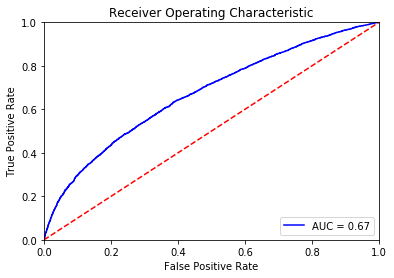

In [59]:
plot_auc_roc(rf_classifier.best_estimator_, X_test, y_test)

### The score of the rf_classifier alone

In [60]:
classifier = rf_classifier.best_estimator_

In [61]:
y_train_pred = classifier.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier.predict(X_test.as_matrix()).ravel()

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [62]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier.predict_proba(X_test.as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6717
Recall:           0.9274
Precision:        0.6851
F1:               0.7880
AUROC:            0.6705
AUPR:             0.7949


# XGBoost

## Parameter Selection

In [21]:
# We will use grid search to improve our search for parameters using Cross Validation
number_estimators = [100, 120, 140]
loss_function = ["deviance", "exponential"]
min_samples_leaf = [1, 0.05, 0.5]
sub_samples = [0.85, 0.8, 0.7]
max_features = ["sqrt"]
xgboost_classifier = GridSearchCV(estimator=GradientBoostingClassifier(), 
                          param_grid=dict(
                              n_estimators=number_estimators,
                              max_features=max_features,
                              subsample=sub_samples,
                          min_samples_leaf=min_samples_leaf,
                          loss=loss_function), verbose=5, n_jobs=-1)

In [27]:
xgboost_classifier.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.85 
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.85 
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.85 
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.8 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.85, score=0.6803726379773598, total=  44.4s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.8 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.85, score=0.6851297185394001, total=  46.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.8 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=100, subsample=0.8, score=0.68072501431528

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.5min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.85, score=0.6849094833281945, total=  54.3s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.8 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.85, score=0.6871999295247324, total=  57.5s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.8, score=0.6840285424833722, total=  53.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.8, score=0.6881909879751574, total=  53.0s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=1, n_estimators=120, subsample=0.8, score

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.2min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=0.05, n_estimators=140, subsample=0.7, score=0.6832136722019116, total=  50.1s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.8 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.85, score=0.6554420120688895, total=   8.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.8, score=0.6554420120688895, total=   9.4s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.8, score=0.6554420120688895, total=   9.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, subsample=0.7 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=0.5, n_estimators=120, su

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.3min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.85, score=0.6554420120688895, total=  10.1s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.8 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.85, score=0.6554420120688895, total=   9.9s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.7 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.8, score=0.6554420120688895, total=  10.4s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.7 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.8, score=0.6554420120688895, total=  10.9s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=0.5, n_estimators=140, subsample=0.7 
[CV]  loss=exponential, max_features=sqrt, min_samples_lea

[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 24.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 120, 140], 'max_features': ['sqrt'], 'subsample': [0.85, 0.8, 0.7], 'min_samples_leaf': [1, 0.05, 0.5], 'loss': ['deviance', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=5)

In [28]:
# as I said in the documentation, GridSeach uses a stratified 3-fold cross validation because a Classifier was passed
# instead of a recgressor

xgboost_classifier.best_params_

{'loss': 'deviance',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 140,
 'subsample': 0.85}

### Score of the single XGBoost

In [29]:
classifier = xgboost_classifier.best_estimator_

In [30]:
y_train_pred = classifier.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier.predict(X_test.as_matrix()).ravel()

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [31]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier.predict_proba(X_test.as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6856
Recall:           0.9121
Precision:        0.7002
F1:               0.7922
AUROC:            0.6971
AUPR:             0.8065


# Ensemble classifiers (Voting)

## Random Forest and XGBoost together

In [66]:
# I get the best estimator of a previous chosen xgboost classifier
classifier = VotingClassifier([('xgboost', xgboost_classifier.best_estimator_), ('randomforest', rf_classifier.best_estimator_)], voting='soft')

In [67]:
classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('xgboost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_l...imators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [68]:
classifier

VotingClassifier(estimators=[('xgboost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_l...imators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

# Evaluation

In [64]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

In [69]:
y_train_pred = classifier.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier.predict(X_test.as_matrix()).ravel()

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


é bom prestar atenção se os valores estão próximo, caso contrário, existe uma boa indicação de que houve
overfitting e o modelo não consegue generalizar tão bem.

In [70]:
print("Mean Square error in train: {:0.1f}".format(mse(y_train, y_train_pred)))
print("Mean Square error in test: {:0.1f}".format(mse(y_test, y_test_pred)))

Mean Square error in train: 0.1
Mean Square error in test: 0.3


In [65]:
def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

In [66]:
def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

In [73]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier.predict_proba(X_test.as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
y_test_pred.shape

(29190,)

In [75]:
y_test.shape

(29190,)

In [76]:
y_test_pred_prob.shape

(29190,)

In [77]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6844
Recall:           0.9165
Precision:        0.6974
F1:               0.7921
AUROC:            0.7012
AUPR:             0.8113


# Evaluate for Kaggle

In [ ]:
kaggle_test_data = pandas.read_csv("real_test_set.csv")

In [ ]:
kaggle_test_data.shape
features_kaggle = kaggle_test_data.drop(["id"], axis=1)
features_kaggle.head(10)

In [ ]:
rf_pred_test_class = rf_clf.predict(features_kaggle)
rf_pred_test_scores = rf_clf.predict_proba(features_kaggle)[:, 1]

In [ ]:
rf_pred_test_class.size

In [ ]:
rf_pred_test_class

Se ligar que na hora que cria o csv, na primeira linha (a linha do header), ele coloca ",0", tem que substituir para "id,IND_BOM_1_1"

In [ ]:
df = pandas.DataFrame(data=rf_pred_test_class)
df.to_csv('test.csv', mode='a', index=True)

In [ ]:
# For in ensemble classifiers
classifier = xgboost_classifier

# RESULTS LOG

## XGBoost - 120 estimators

In [89]:

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6607
Recall:           0.9790
Precision:        0.6636
F1:               0.7910
AUROC:            0.6295
AUPR:             0.7507


In [91]:

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6607
Recall:           0.9790
Precision:        0.6636
F1:               0.7910
AUROC:            0.6295
AUPR:             0.7507


## XGBoost - 2nd configuration

In [ ]:
# parameters
number_estimators = [30, 60, 120, 200]
loss_function = ["deviance", "exponential"]
min_samples_leaf = [1, 0.05]
sub_samples = [1.0, 0.8, 0.6]
max_features = ["log2", "sqrt", "auto"]

In [100]:
classifier.best_params_

{'loss': 'deviance',
 'max_features': 'auto',
 'min_samples_leaf': 0.05,
 'n_estimators': 200,
 'subsample': 0.8}

In [105]:

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6878
Recall:           0.9007
Precision:        0.7052
F1:               0.7910
AUROC:            0.7065
AUPR:             0.8131


# Ensemble Of XBGoost and RandomForest

Without Tuning of the random forest parameters

In [51]:
classifier

VotingClassifier(estimators=[('xgboost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_l...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [52]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6766
Recall:           0.8842
Precision:        0.7010
F1:               0.7820
AUROC:            0.6773
AUPR:             0.7933


## Random forest optimized

In [27]:
# as I said in the documentation, GridSeach uses a stratified 3-fold cross validation because a Classifier was passed
# instead of a recgressor

xgboost_classifier.best_params_

{'loss': 'deviance',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 120,
 'subsample': 0.8}

In [41]:
rf_classifier.best_params_

{'class_weight': {0: 1, 1: 1},
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [40]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6829
Recall:           0.9383
Precision:        0.6899
F1:               0.7952
AUROC:            0.7052
AUPR:             0.8132


# MLPs and Ensemble MLPS

In [65]:
y_train_pred = classifier_1.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier_1.predict(X_test.as_matrix()).ravel()

# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier_1.predict_proba(X_test.as_matrix())[:, 0]

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  



Performance no conjunto de teste:

Accuracy:         0.6664
Recall:           0.8560
Precision:        0.7013
F1:               0.7710
AUROC:            0.6650
AUPR:             0.7853


In [66]:
y_train_pred = classifier_2.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier_2.predict(X_test.as_matrix()).ravel()

# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier_2.predict_proba(X_test.as_matrix())[:, 0]

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  



Performance no conjunto de teste:

Accuracy:         0.6660
Recall:           0.8400
Precision:        0.7064
F1:               0.7674
AUROC:            0.6698
AUPR:             0.7878


In [67]:
y_train_pred = classifier_3.predict(X_train.as_matrix()).ravel()
y_test_pred = classifier_3.predict(X_test.as_matrix()).ravel()

# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier_3.predict_proba(X_test.as_matrix())[:, 0]

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  



Performance no conjunto de teste:

Accuracy:         0.6684
Recall:           0.8315
Precision:        0.7116
F1:               0.7669
AUROC:            0.6739
AUPR:             0.7916


In [68]:
y_train_pred = voting_classifier.predict(X_train.as_matrix()).ravel()
y_test_pred = voting_classifier.predict(X_test.as_matrix()).ravel()

# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier_1.predict_proba(X_test.as_matrix())[:, 0]

print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  



Performance no conjunto de teste:

Accuracy:         0.6493
Recall:           0.7997
Precision:        0.7051
F1:               0.7495
AUROC:            0.6650
AUPR:             0.7853


# Stacking RF and XGBoost

## Classify data based on RF

In [35]:
y_train_pred = rf_classifier.best_estimator_.predict(X_train.as_matrix()).ravel()
y_test_pred = rf_classifier.best_estimator_.predict(X_test.as_matrix()).ravel()

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [50]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = rf_classifier.predict_proba(X_test.drop("rf_feature", axis=1).as_matrix())[:, 1]
y_train_pred_prob = rf_classifier.predict_proba(X_train.drop("rf_feature", axis=1).as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [51]:
# add random forest prediction as feature
X_train["rf_feature"] = y_train_pred_prob 
X_test["rf_feature"] = y_test_pred_prob

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = classifier.predict_proba(X_test.as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Add XGBoost to read from new X_train data

In [37]:
xgboost_classifier.best_params_

{'loss': 'deviance',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 140,
 'subsample': 0.85}

In [39]:
xgboost_classifier = GradientBoostingClassifier(n_estimators=140, subsample=0.85, max_features="sqrt", min_samples_leaf=1)

In [52]:
xgboost_classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=140,
              presort='auto', random_state=None, subsample=0.85, verbose=0,
              warm_start=False)

In [53]:
y_train_pred = xgboost_classifier.predict(X_train.as_matrix()).ravel()
y_test_pred = xgboost_classifier.predict(X_test.as_matrix()).ravel()

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [54]:
# This returns an array for the probabilities of being each class, so it depends what the focus will be
# in our case, the focus is at class 1
y_test_pred_prob = xgboost_classifier.predict_proba(X_test.as_matrix())[:, 1]

/home/fbormann/anaconda3/envs/IF702-redes-neurais/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_test_pred.round(), y_test_pred_prob)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Performance no conjunto de teste:

Accuracy:         0.6670
Recall:           0.8012
Precision:        0.7224
F1:               0.7598
AUROC:            0.6742
AUPR:             0.7823


In [61]:
import math
from scipy import stats

position = 0
class_0 = 0
class_1 = 0
counting_class_0 = [0] * 101
counting_class_1 = [0] * 101
grouped_counting_class_0 = [0] * 101
grouped_counting_class_1 = [0] * 101
percentage_counting_class_0 = [0.0] * 101
percentage_counting_class_1 = [0.0] * 101

for x in y_test:
    score = math.floor(y_test_pred_prob[position]*100)
    if x == 0:
        class_0 += 1
        counting_class_0[score] += 1
    else:
        class_1 += 1
        counting_class_1[score] += 1
    position += 1

last_value_class_0 = 0
last_value_class_1 = 0

for x in range(0, 101):
    last_value_class_0 += counting_class_0[x]
    grouped_counting_class_0[x] = last_value_class_0
    percentage_counting_class_0[x] = last_value_class_0/class_0
    
    last_value_class_1 += counting_class_1[x]
    grouped_counting_class_1[x] = last_value_class_1
    percentage_counting_class_1[x] = last_value_class_1/class_1

#stats.ks_2samp(percentage_counting_class_0, percentage_counting_class_1)
stats.ks_2samp(grouped_counting_class_0, grouped_counting_class_1)

Ks_2sampResult(statistic=0.12871287128712872, pvalue=0.34994207557716706)